In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

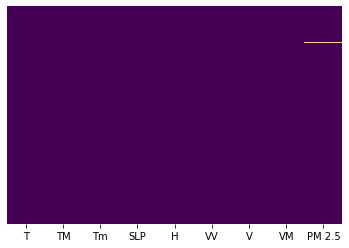

In [3]:
#checking for the null valuse using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
#removethe null valuses 
df= df.dropna()

<AxesSubplot:>

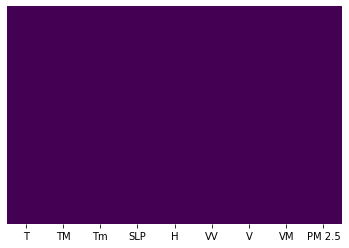

In [5]:
#checking for the null valuse using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

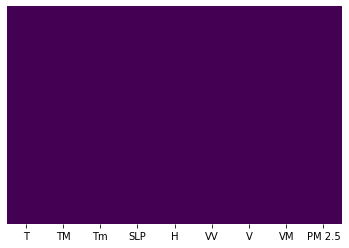

In [6]:
#checking for the null valuse using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

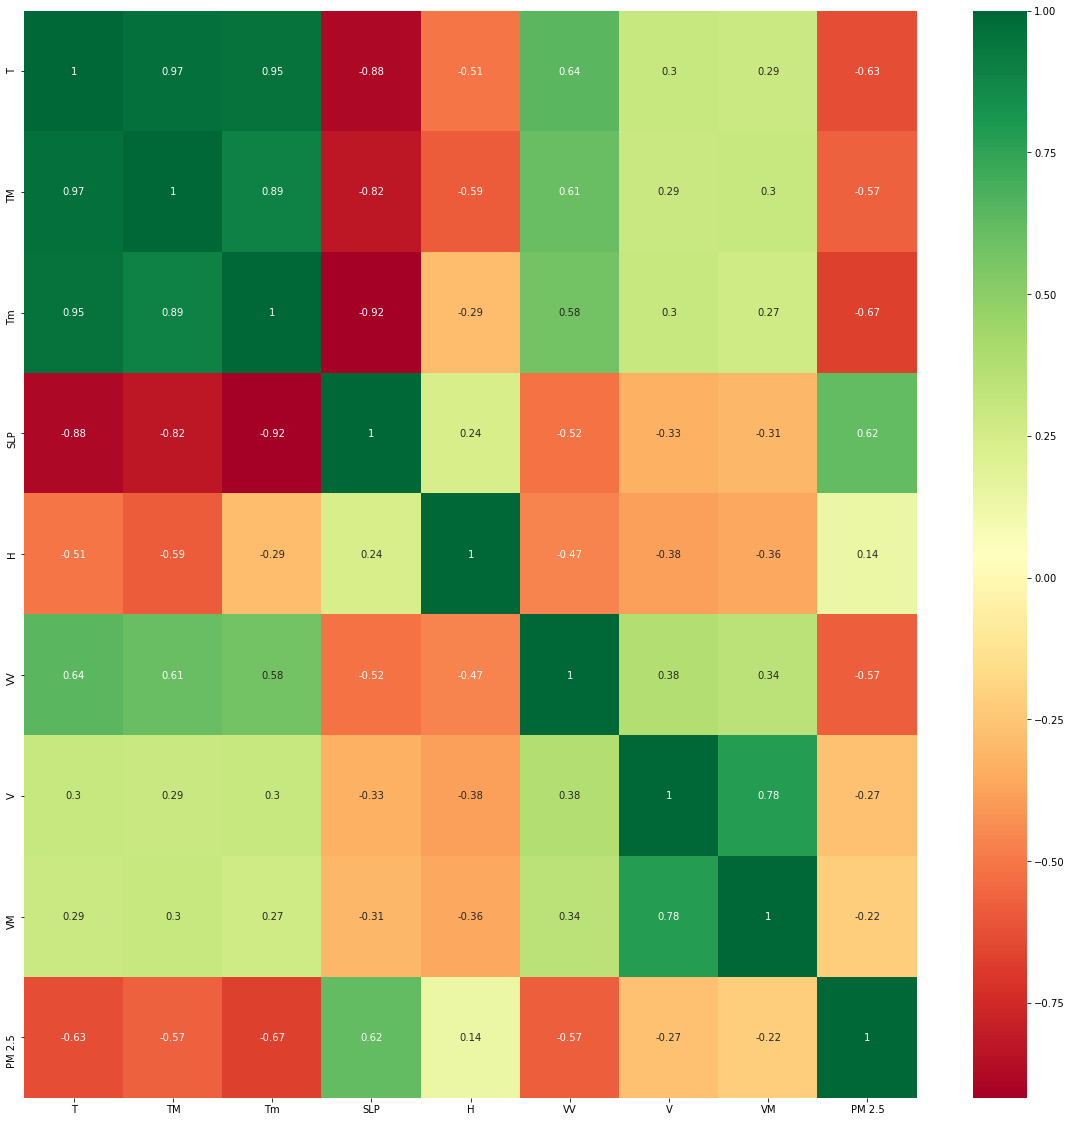

In [7]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
X = df.iloc[:,:-1]# for independent features
y= df.iloc[:,-1] # for dependent features

In [15]:
X.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'], dtype='object')

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [17]:
print(model.feature_importances_)

[0.17228314 0.09980192 0.23344246 0.12824606 0.08541063 0.18074261
 0.05688646 0.04318672]


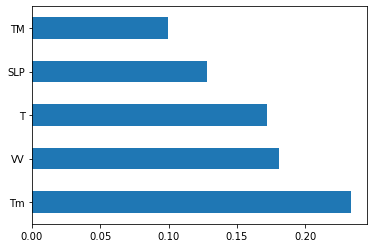

In [18]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\1mura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

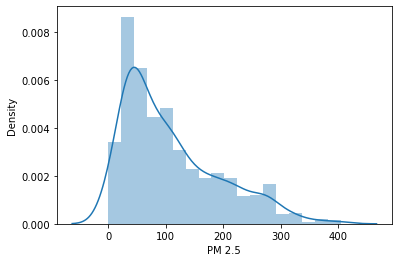

In [19]:
sns.distplot(y)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [23]:
import xgboost as xgb

In [24]:
regressor = xgb.XGBRegressor()

In [25]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [26]:
print("r2 score for the train data {}".format(regressor.score(X_train,y_train)))

r2 score for the train data 0.9997717196345083


In [27]:
print("r2 score for the test data {}".format(regressor.score(X_test,y_test)))

r2 score for the test data 0.8123312908288712


In [28]:
predictor = regressor.predict(X_test)

C:\Users\1mura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

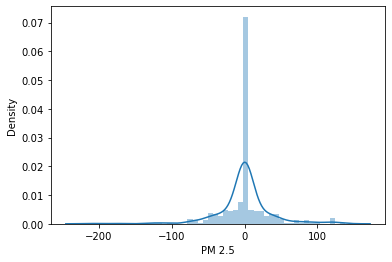

In [29]:
sns.distplot(y_test-predictor)

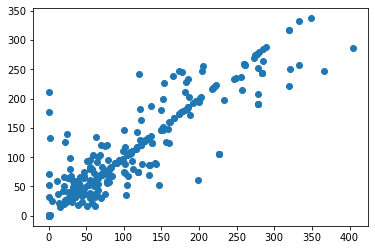

In [30]:
plt.scatter(y_test,predictor)

### Cross validation score

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
score = cross_val_score(regressor,X,y,cv=5)

In [34]:
score.mean()

0.7251276747945072

### Hyperparameter Tuning

In [37]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [38]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [39]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2,random_state=43)

In [42]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.2s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   1.4s
[CV] END learning_ra

[CV] END learning_rate=0.2, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=5, n_estimators=600, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=5, n_estimators=600, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=5, n_estimators=600, subsample=0.7; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=5, n_estimators=600, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=5, n_estimators=600, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=20, min_child_weight=6, n_estimators=1200, su

[CV] END learning_rate=0.1, max_depth=30, min_child_weight=4, n_estimators=700, subsample=0.6; total time=   2.6s
[CV] END learning_rate=0.3, max_depth=15, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.3, max_depth=15, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.3, max_depth=15, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.3, max_depth=15, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.3, max_depth=15, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=400, subsam

[CV] END learning_rate=0.05, max_depth=25, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   3.3s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   3.4s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   3.1s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500, 

[CV] END learning_rate=0.2, max_depth=5, min_child_weight=7, n_estimators=1100, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=7, n_estimators=1100, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.3, max_depth=15, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=15, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.3, max_depth=15, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.3, max_depth=15, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.3, max_depth=15, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=700, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=700, subsampl

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=700, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=700, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=700, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=700, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=700, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   2.4s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   2.4s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=1200, subsampl

[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=800, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=800, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=800, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=20, min_child_weight=4, n_estimators=200, subs

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
    

In [43]:
xg_random.best_params_

{'subsample': 0.7,
 'n_estimators': 600,
 'min_child_weight': 4,
 'max_depth': 30,
 'learning_rate': '0.05'}

In [44]:
xg_random.best_score_

-1415.7588791520934

In [45]:
predictions=xg_random.predict(X_test)

C:\Users\1mura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

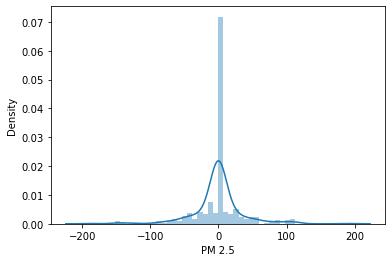

In [46]:
sns.distplot(y_test-predictions)


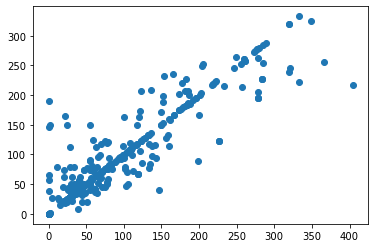

In [47]:
plt.scatter(y_test,predictions)

In [48]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19.086953234750062
MSE: 1353.770504049169
RMSE: 36.79362042595386


In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19.086953234750062
MSE: 1353.770504049169
RMSE: 36.79362042595386


In [50]:
import pickle 

In [52]:
# open a file, where you ant to store the data
file = open('xgboosting_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)